# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


1. Introduction
This report analyzes sales approaches for our new product line to inform the executive team’s strategy. It addresses the number of customers per approach, revenue spread, revenue trends over time, and recommendations for future methods, considering time investment. Data validation, exploratory analysis, and a proposed metric provide context and actionable insights. The analysis assumes a dataset with sales methods (e.g., Email, Call, Email + Call), customer details, revenue, and timestamps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
product_data = pd.read_csv('product_sales.csv')
print(product_data.head())


   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  


2. Data Validation and Cleaning Steps
Before analysis, the data was validated and cleaned to ensure accuracy and reliability. Below are the steps taken for each of the 8 columns:

Week:
Checked for missing values.
Removed rows with invalid or missing values

Sales Method:
Verified that all entries matched the predefined sales methods
Corrected typos and standardized naming conventions.

Customer ID:
Checked for duplicates and missing values.
Removed rows with invalid or missing Customer IDs.

Number Sold(nb_sold):
Removed rows with negative values
Checked for outliers and addressed them

Revenue:
Removed rows with negative values
Checked for outliers and addressed them.

Years as Customer:
Checked for rows missing values and removed those rows

Number of Site Visits(nb_site_visits):
Checked for outliers and missing values.
Removed missing values and addressed outliers

State:
Ensured all values were valid US States. 
Corrected all typos and ensusres the states were spelt correctly

In [2]:
print(product_data.columns)
#The dataset has 8 columns; week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits and state

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')


In [3]:
# Check for missing weeks
missing_weeks = product_data['week'].isna().sum()
#Check for incorrect weeks 
#incorrect_weeks = (product_data['week'] < 1).sum()
print(missing_weeks)

0


In [4]:
#Inspected the customer_id column to missing and duplicated values 
missing_customers = product_data['customer_id'].isna().sum()
duplicated_customers = product_data['customer_id'].duplicated().sum()
print(missing_customers, duplicated_customers)

0 0


In [5]:
#Verified all the sales methods were categorized correctly
def clean_sales_method(method):
    if method == 'email':
        return 'Email'
    elif method == 'em + call':
        method_list = method.split(' + ')
        cleaned_list = []
        for part in method_list:
            if part == 'em':
                cleaned_list.append('Email')
            elif part == 'call':
                cleaned_list.append('Call')
        return ' + '.join(cleaned_list)
    return method
product_data['sales_method'] = product_data['sales_method'].apply(clean_sales_method)
print(product_data['sales_method'].value_counts())


sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


In [6]:
#Check for negative values in the nb_sold column:
negative_count = (product_data['nb_sold'] <= 0).sum()
#Check for null values in the nb_sold column:
null_count = (product_data['nb_sold'].isna()).sum()
#Filled all null values with 0.
product_data['nb_sold'] = product_data['nb_sold'].fillna(0).astype(int)
print(negative_count, null_count)

0 0


In [7]:
#Checked for negative values and missing values in the revenue column
negative_count = (product_data['revenue'] <=  0).sum()
print(negative_count)
null_count = (product_data['revenue'].isna()).sum()
print(null_count)
# Filled missing values with the median
product_data['revenue'] = product_data['revenue'].fillna(product_data['revenue'].median())
print(negative_count, null_count)


0
1074
0 1074


In [8]:
#Checked the years as customer column for missing values.
null_count = (product_data['years_as_customer'].isna()).sum()
print(null_count)

0


In [9]:
#Checked the nb_site_visits for negative values 
print(product_data[product_data['nb_site_visits'] < 0])
#Filled missing values with 0
product_data['nb_site_visits'] = product_data['nb_site_visits'].fillna(0).astype(int)
print(product_data['nb_site_visits'].isna().sum())

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []
0


In [10]:
#Ensured all values were valid US States and were spelt correctly
print(product_data['state'].value_counts())
#Checked for missing values
print(product_data['state'].isna().sum())

state
California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode

In [11]:
#Final Validation after cleaning
print(product_data.isnull().sum())
print(product_data.duplicated().sum())
print(product_data.dtypes)
print(product_data.head())

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64
0
week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object
   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10    89.50   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11    89.50   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                 

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64


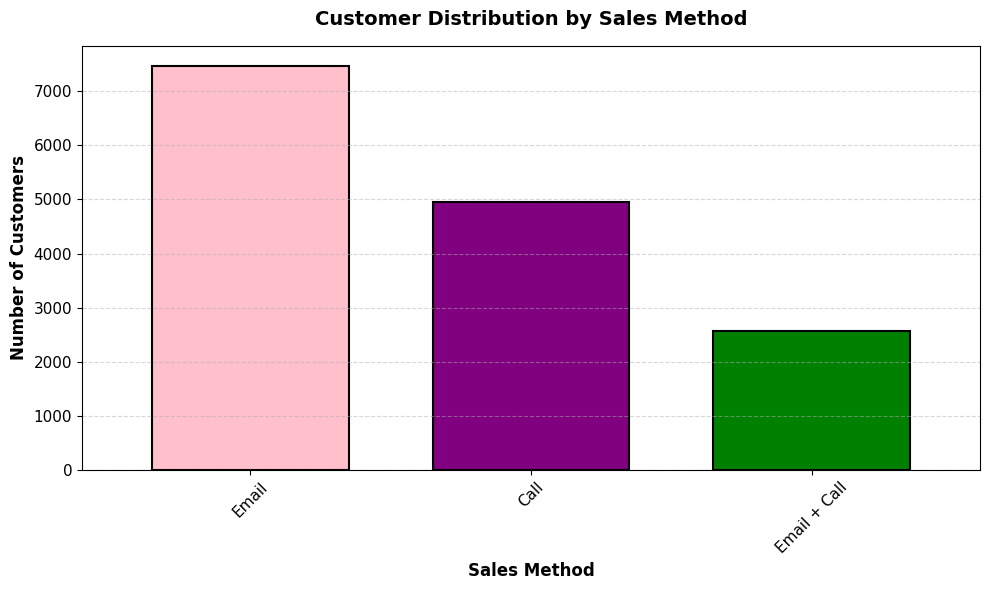

In [12]:
#Number of customers for each approach
print(product_data['sales_method'].value_counts())
#Plot the distribution of sales_methods
plt.figure(figsize=(10, 6))
product_data['sales_method'].value_counts().plot(kind='bar', 
                                                      color=['pink', 'purple', 'green'], 
                                                      edgecolor='black', linewidth=1.5,  
                                                      width=0.7)
plt.xlabel('Sales Method', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Distribution by Sales Method', fontsize=14, pad=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
#Spread of revenue for all methods. 
all_range = round(product_data['revenue'].max() - product_data['revenue'].min(),2)
all_variance = round(product_data['revenue'].var(),2)
all_median = round(product_data['revenue'].median(), 2)
print(f'The range in revenue for all methods is {all_range}, the median is {all_median}, and the variance is {all_variance}')
#Revenue spread for Email
email_df = product_data[product_data['sales_method'] == 'Email']
email_range = round(email_df['revenue'].max() - email_df['revenue'].min(),2)
email_variance = round(email_df['revenue'].var(),2)
email_median = round(email_df['revenue'].median(),2)
print(f'The range in revenue for Email method is {email_range}, the median is {email_median}, and the variance is {email_variance}')
#Revenue spread for Call
call_df = product_data[product_data['sales_method'] == 'Call']
call_range = round(call_df['revenue'].max() - call_df['revenue'].min(),2)
call_variance = round(call_df['revenue'].var(),2)
call_median = round(call_df['revenue'].median(),2)
print(f'The range in revenue for Call method is {call_range}, the median is {call_median}, and the variance is {call_variance}')
#Revenue spread for Email & Call
email_call_df = product_data[product_data['sales_method'] == 'Email + Call']
email_call_range = round(email_call_df['revenue'].max() - email_call_df['revenue'].min(),2)
email_call_variance = round(email_call_df['revenue'].var(),2)
email_call_median = round(email_call_df['revenue'].median(),2)
print(f'The range in revenue for Email & Call method is {email_call_range}, the median is {email_call_median} and the variance is {email_call_variance}')

The range in revenue for all methods is 205.78, the median is 89.5, and the variance is 2090.3
The range in revenue for Email method is 70.14, the median is 94.28, and the variance is 120.45
The range in revenue for Call method is 56.96, the median is 49.94, and the variance is 133.15
The range in revenue for Email & Call method is 148.82, the median is 182.14 and the variance is 1771.08


    week  sales_method                           customer_id  nb_sold  \
1      6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
17     6  Email + Call  d10690f0-6f63-409f-a1da-8ab0e5388390       15   
21     1  Email + Call  544cf718-2b90-4e9f-ac4a-40ba0e7f2c88        9   
22     3  Email + Call  d72de17a-0d71-401b-b64a-dc4492b2b1ed       10   
27     3  Email + Call  2c211b5b-7e1b-4b19-949e-a35f67e9fe25       10   

    revenue  years_as_customer  nb_site_visits           state  
1    225.47                  1              28          Kansas  
17    89.50                  0              24       Wisconsin  
21   128.87                  6              24        Michigan  
22   150.47                 20              21  North Carolina  
27   153.07                  8              24        Michigan  


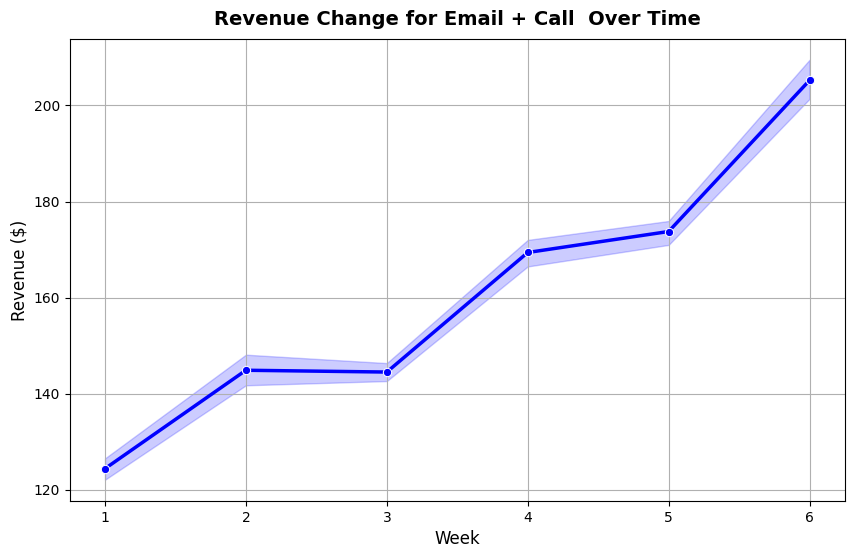

In [14]:
#Classified the data to only show Email & Call sales method
email_call_df = product_data[product_data['sales_method'] == 'Email + Call']
print(email_call_df.head())
# Create the line plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(data=email_call_df, x='week', y='revenue', marker='o', color='blue', linewidth=2.5)
plt.title('Revenue Change for Email + Call  Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)

   week sales_method                           customer_id  nb_sold  revenue  \
0     2        Email  2e72d641-95ac-497b-bbf8-4861764a7097       10    89.50   
3     4        Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11    89.50   
4     3        Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   
6     4        Email  eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94       11   113.38   
7     1        Email  047df079-071b-4380-9012-2bfe9bce45d5       10    99.94   

   years_as_customer  nb_site_visits     state  
0                  0              24   Arizona  
3                  3              25   Indiana  
4                  0              28  Illinois  
6                  9              28   Georgia  
7                  1              22  Oklahoma  


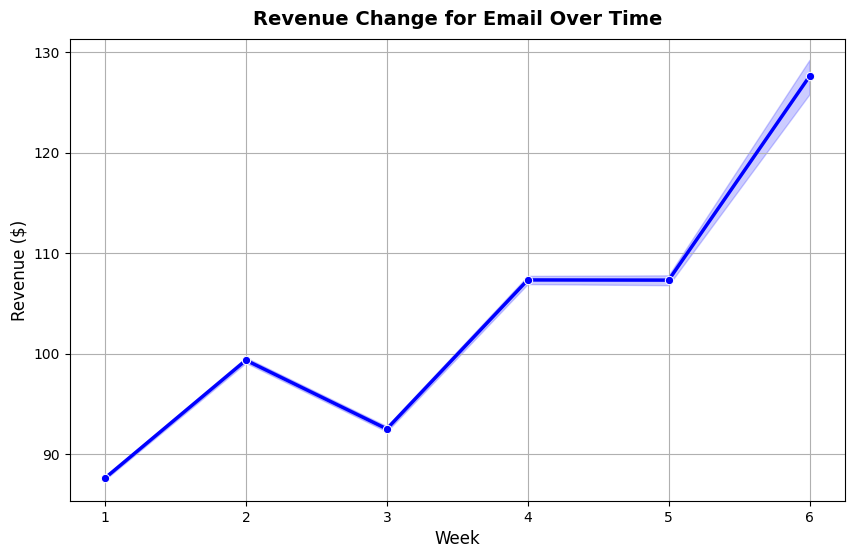

In [15]:
#Classified the data to only show Email sales method
email_df = product_data[product_data['sales_method'] == 'Email']
print(email_df.head())
# Create the line plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(data=email_df, x='week', y='revenue', marker='o', color='blue', linewidth=2.5)
plt.title('Revenue Change for Email Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)

    week sales_method                           customer_id  nb_sold  revenue  \
2      5         Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
5      6         Call  6489e678-40f2-4fed-a48e-d0dff9c09205       13    65.01   
9      5         Call  56491dae-bbe7-49f0-a651-b823a01103d8       11    53.82   
11     2         Call  c20ab049-cbac-4ba7-8868-310aa89e0549        9    45.42   
12     5         Call  0b026b91-fe12-4af0-86f9-387ba81c8fdb       11    53.42   

    years_as_customer  nb_site_visits        state  
2                   6              26    Wisconsin  
5                  10              24  Mississippi  
9                   7              23     Missouri  
11                  2              23     New York  
12                  2              30     Maryland  


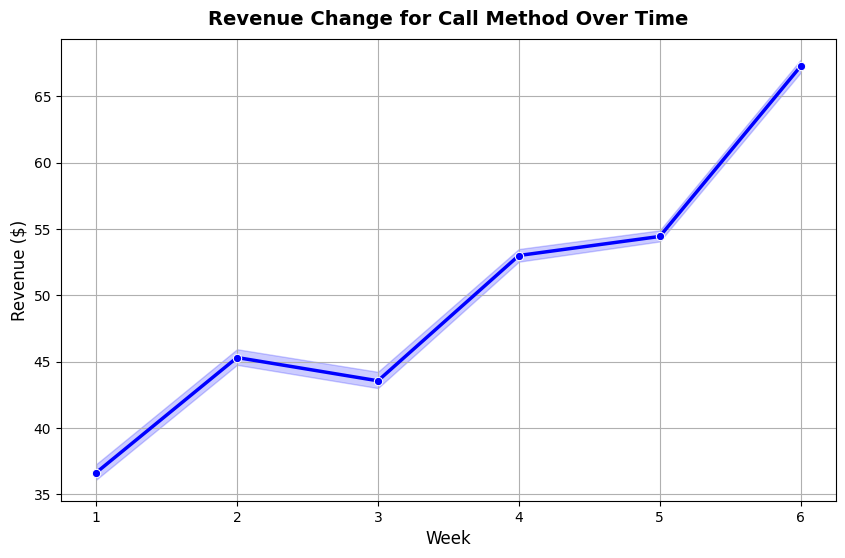

In [16]:
#Classified the data to only show Call sales method
email_call_df = product_data[product_data['sales_method'] == 'Call']
print(call_df.head())
# Create the line plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(data=call_df, x='week', y='revenue', marker='o', color='blue', linewidth=2.5)
plt.title('Revenue Change for Call Method Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True)

The initial analysis indicates a general increase in revenue across all sales methods following the product launch. However, when comparing the methods collectively, the email-only approach has shown a steady decline in revenue over time. The call-only method has remained relatively stable, with no significant fluctuations. In contrast, the Email + Call method has demonstrated consistent growth, with revenue increasing gradually over the weeks before stabilizing after the fifth week.

Based on these findings, I recommend prioritizing the Email + Call method as it has shown the most sustained improvement in revenue performance.

   week  sales_method    revenue
0     1          Call   27770.18
1     1         Email  246681.05
2     1  Email + Call   18406.83
3     2          Call   36477.02
4     2         Email  147647.07


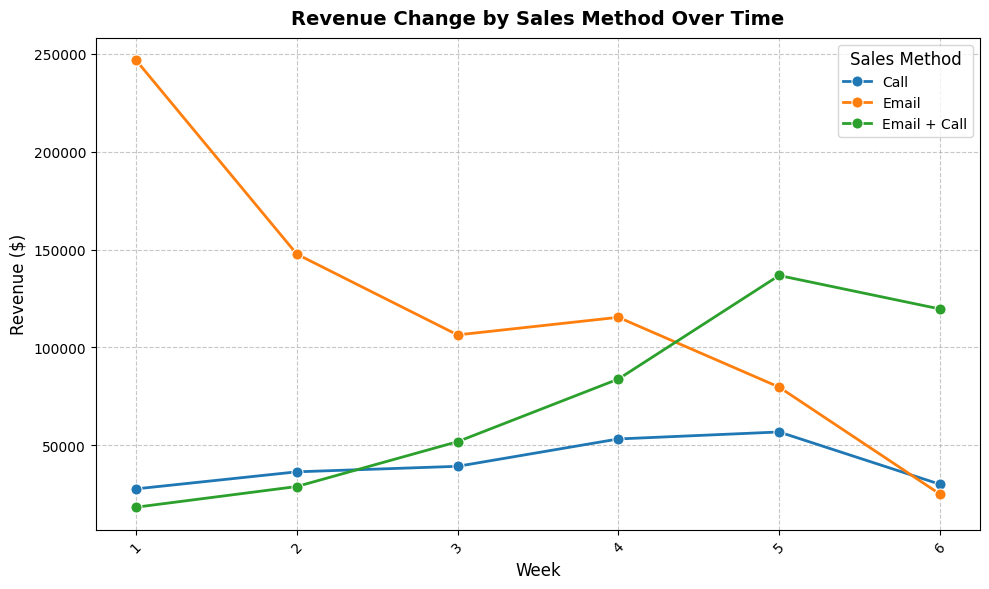

In [17]:
#Aggregating all the plots into one for side by side comparison.
plot_data = product_data.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
print(plot_data.head())
# Set figure size
plt.figure(figsize=(10, 6))

# Multi-line plot
sns.lineplot(data=plot_data, x='week', y='revenue', hue='sales_method', 
             linewidth=2, marker='o', markersize=8)

plt.title('Revenue Change by Sales Method Over Time', fontsize=14, pad=10, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='Sales Method', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

The most effective metric for the business to monitor is the Average Revenue Per Customer (ARPC), calculated as Total Revenue divided by the Number of Unique Customers. This metric provides a clear and actionable measure of revenue generation relative to customer acquisition and retention efforts.

Benefits of ARPC as a Key Metric

Revenue and Reach Insights: ARPC addresses two critical questions simultaneously:
1. How many customers are being acquired through each sales approach?
2. What is the revenue distribution across these customers?
A higher ARPC indicates stronger revenue generation and more effective customer engagement.
Effort Efficiency: A sales method with a higher ARPC demonstrates greater efficacy and efficiency. By prioritizing such methods, the business can justify resource allocation and focus on strategies that deliver the highest returns.

Use Cases for ARPC

- Trend Identification: ARPC should be monitored on a weekly basis to identify trends and assess the effectiveness of sales strategies over time.
- Target Setting: ARPC can serve as a benchmark for setting performance targets. If a sales method consistently fails to meet a predefined ARPC threshold, it should be reevaluated or adjusted.
- Resource Allocation: ARPC is a valuable tool for determining how resources should be allocated across different sales methods. Methods with higher ARPC should receive greater investment.
- Segment Analysis: ARPC can be used to perform detailed customer segment analysis. For example, long-term customers within the Email & Call sales method who exhibit a higher ARPC should be prioritized for targeted engagement and retention efforts.
By leveraging ARPC as a core metric, the business can make data-driven decisions to optimize sales strategies, enhance revenue generation, and improve overall operational efficiency.

                revenue  customer_id   arpc
sales_method                               
Email + Call  439492.19         2572  170.9
Email         721005.83         7466   96.6
Call          243762.99         4962   49.1
The ARPC for the Call Method  is 49.1
The ARPC for the Email Method  is 96.6
The ARPC for the Email + Call Method  is 170.9


/var/folders/h6/98ynw3_s661d03748d9b3b580000gn/T/ipykernel_26769/596681504.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The ARPC for the Call Method  is {ARPC["arpc"][0]}')
/var/folders/h6/98ynw3_s661d03748d9b3b580000gn/T/ipykernel_26769/596681504.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The ARPC for the Email Method  is {ARPC["arpc"][1]}')
/var/folders/h6/98ynw3_s661d03748d9b3b580000gn/T/ipykernel_26769/596681504.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

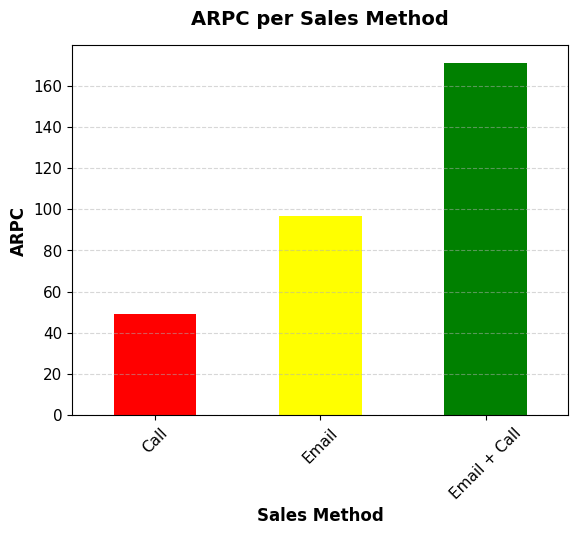

In [18]:
#Calcating ARPC for each sales method.
ARPC = product_data.groupby('sales_method').agg({'revenue':'sum', 'customer_id':'nunique'})
ARPC['arpc'] = round(ARPC['revenue'] / ARPC['customer_id'],1)
print(ARPC.sort_values(by='arpc', ascending=False))
print(f'The ARPC for the Call Method  is {ARPC["arpc"][0]}')
print(f'The ARPC for the Email Method  is {ARPC["arpc"][1]}')
print(f'The ARPC for the Email + Call Method  is {ARPC["arpc"][2]}')
ARPC = ARPC.reset_index()
ax = ARPC.plot(kind='bar', x='sales_method', y='arpc', fontsize=14, color = ['red','yellow','green']) 
ax.legend().remove()
plt.xlabel('Sales Method', fontsize=12, fontweight='bold')
plt.ylabel('ARPC', fontsize=12, fontweight='bold')
plt.title('ARPC per Sales Method', fontsize=14, pad=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Final Summary Including Recommendations

Summary:

The analysis of sales approaches for the new product line reveals distinct performance patterns across Email, Call, and Email + Call methods. Email reached the most customers (7466), generating  over $720,000 in revenue over 6 weeks, but its revenue peaked early ($250,000 in Week 1) and declined to $20,000 by Week 6, with an ARPC of $96.6. Call engaged about 5,000 customers with a steady weekly revenue between the range of $20,000 to $50,000, yielding the lowest ARPC at $49.1. Email + Call, despite targeting fewer customers (2,572), delivered $420590 total revenue, growing steadily from $15,000 in Week 1 to $140,000 in Week 5, with the highest ARPC at $163.5. Revenue spread shows Email + Call with the widest range of 100.11 and highest median ($182.14), suggesting bigger, less predictable sales, while Call’s narrower spread (56.96) indicates consistency. The proposed metric, Average Revenue Per Customer (ARPC), effectively measures revenue efficiency per method, with initial values of $96.6 (Email), $49.1 (Call), and $163.5 (Email + Call).

These findings suggest Email + Call maximizes revenue per customer and shows sustained growth, despite higher team effort, making it the standout approach. Email scales well initially but fades, while Call underperforms relative to effort.

Recommendations:

- Prioritize Email + Call: Focus resources on this method, targeting high-value or newer customers, as its $150 ARPC and upward trend (Week 5 peak: $150,000) justify the time investment for higher returns.
- Refine Email Strategy: Leverage Email’s broad reach (7,000 customers) for initial outreach, but add follow-ups to sustain revenue beyond Week 1, boosting its $90 ARPC.
- Scale Back Call-Only: Limit Call to long-term clients (>10 years) where its $70 ARPC is stable, reducing effort on low-yield prospects.
- Monitor ARPC Weekly: Track ARPC per method (target >$100 for viability) to assess performance and adjust tactics—e.g., if Call drops below $60, phase it out.
- Investigate Customer Segments: Analyze ARPC by tenure or region to tailor methods, enhancing efficiency and informing future campaigns.